In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
toyota=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyota

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

# EDA

In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
toyota.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [5]:
#Creating df with only useful values from main data set
toyota2=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota2

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [6]:
#Renaming the columns
toyota2=toyota2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota2

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1436 rows x 9 columns]

In [7]:
#Finding duplicate values
toyota2[toyota2.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [8]:
toyota_final=toyota2.drop_duplicates().reset_index(drop=True)
toyota_final

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [9]:
toyota_final.describe()

Price          Age             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears           QT       Weight  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

# CORRELATION ANALYSIS

In [10]:
toyota_final.corr()

Price       Age        KM        HP        CC     Doors     Gears  \
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QT      0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

              QT    Weight  
Price   0.211508  0.575869  
Age    -0.193319 -0.466484  
KM      0.283312 -0.023969  
HP     -0.302287  0.087143  
CC      0.305982  0.335077  
Doors   0.107353  0.301734  
Gears  -0.005125  0.021238  
QT      1.000000  0.621988  
Weight  0.621988  1.000000

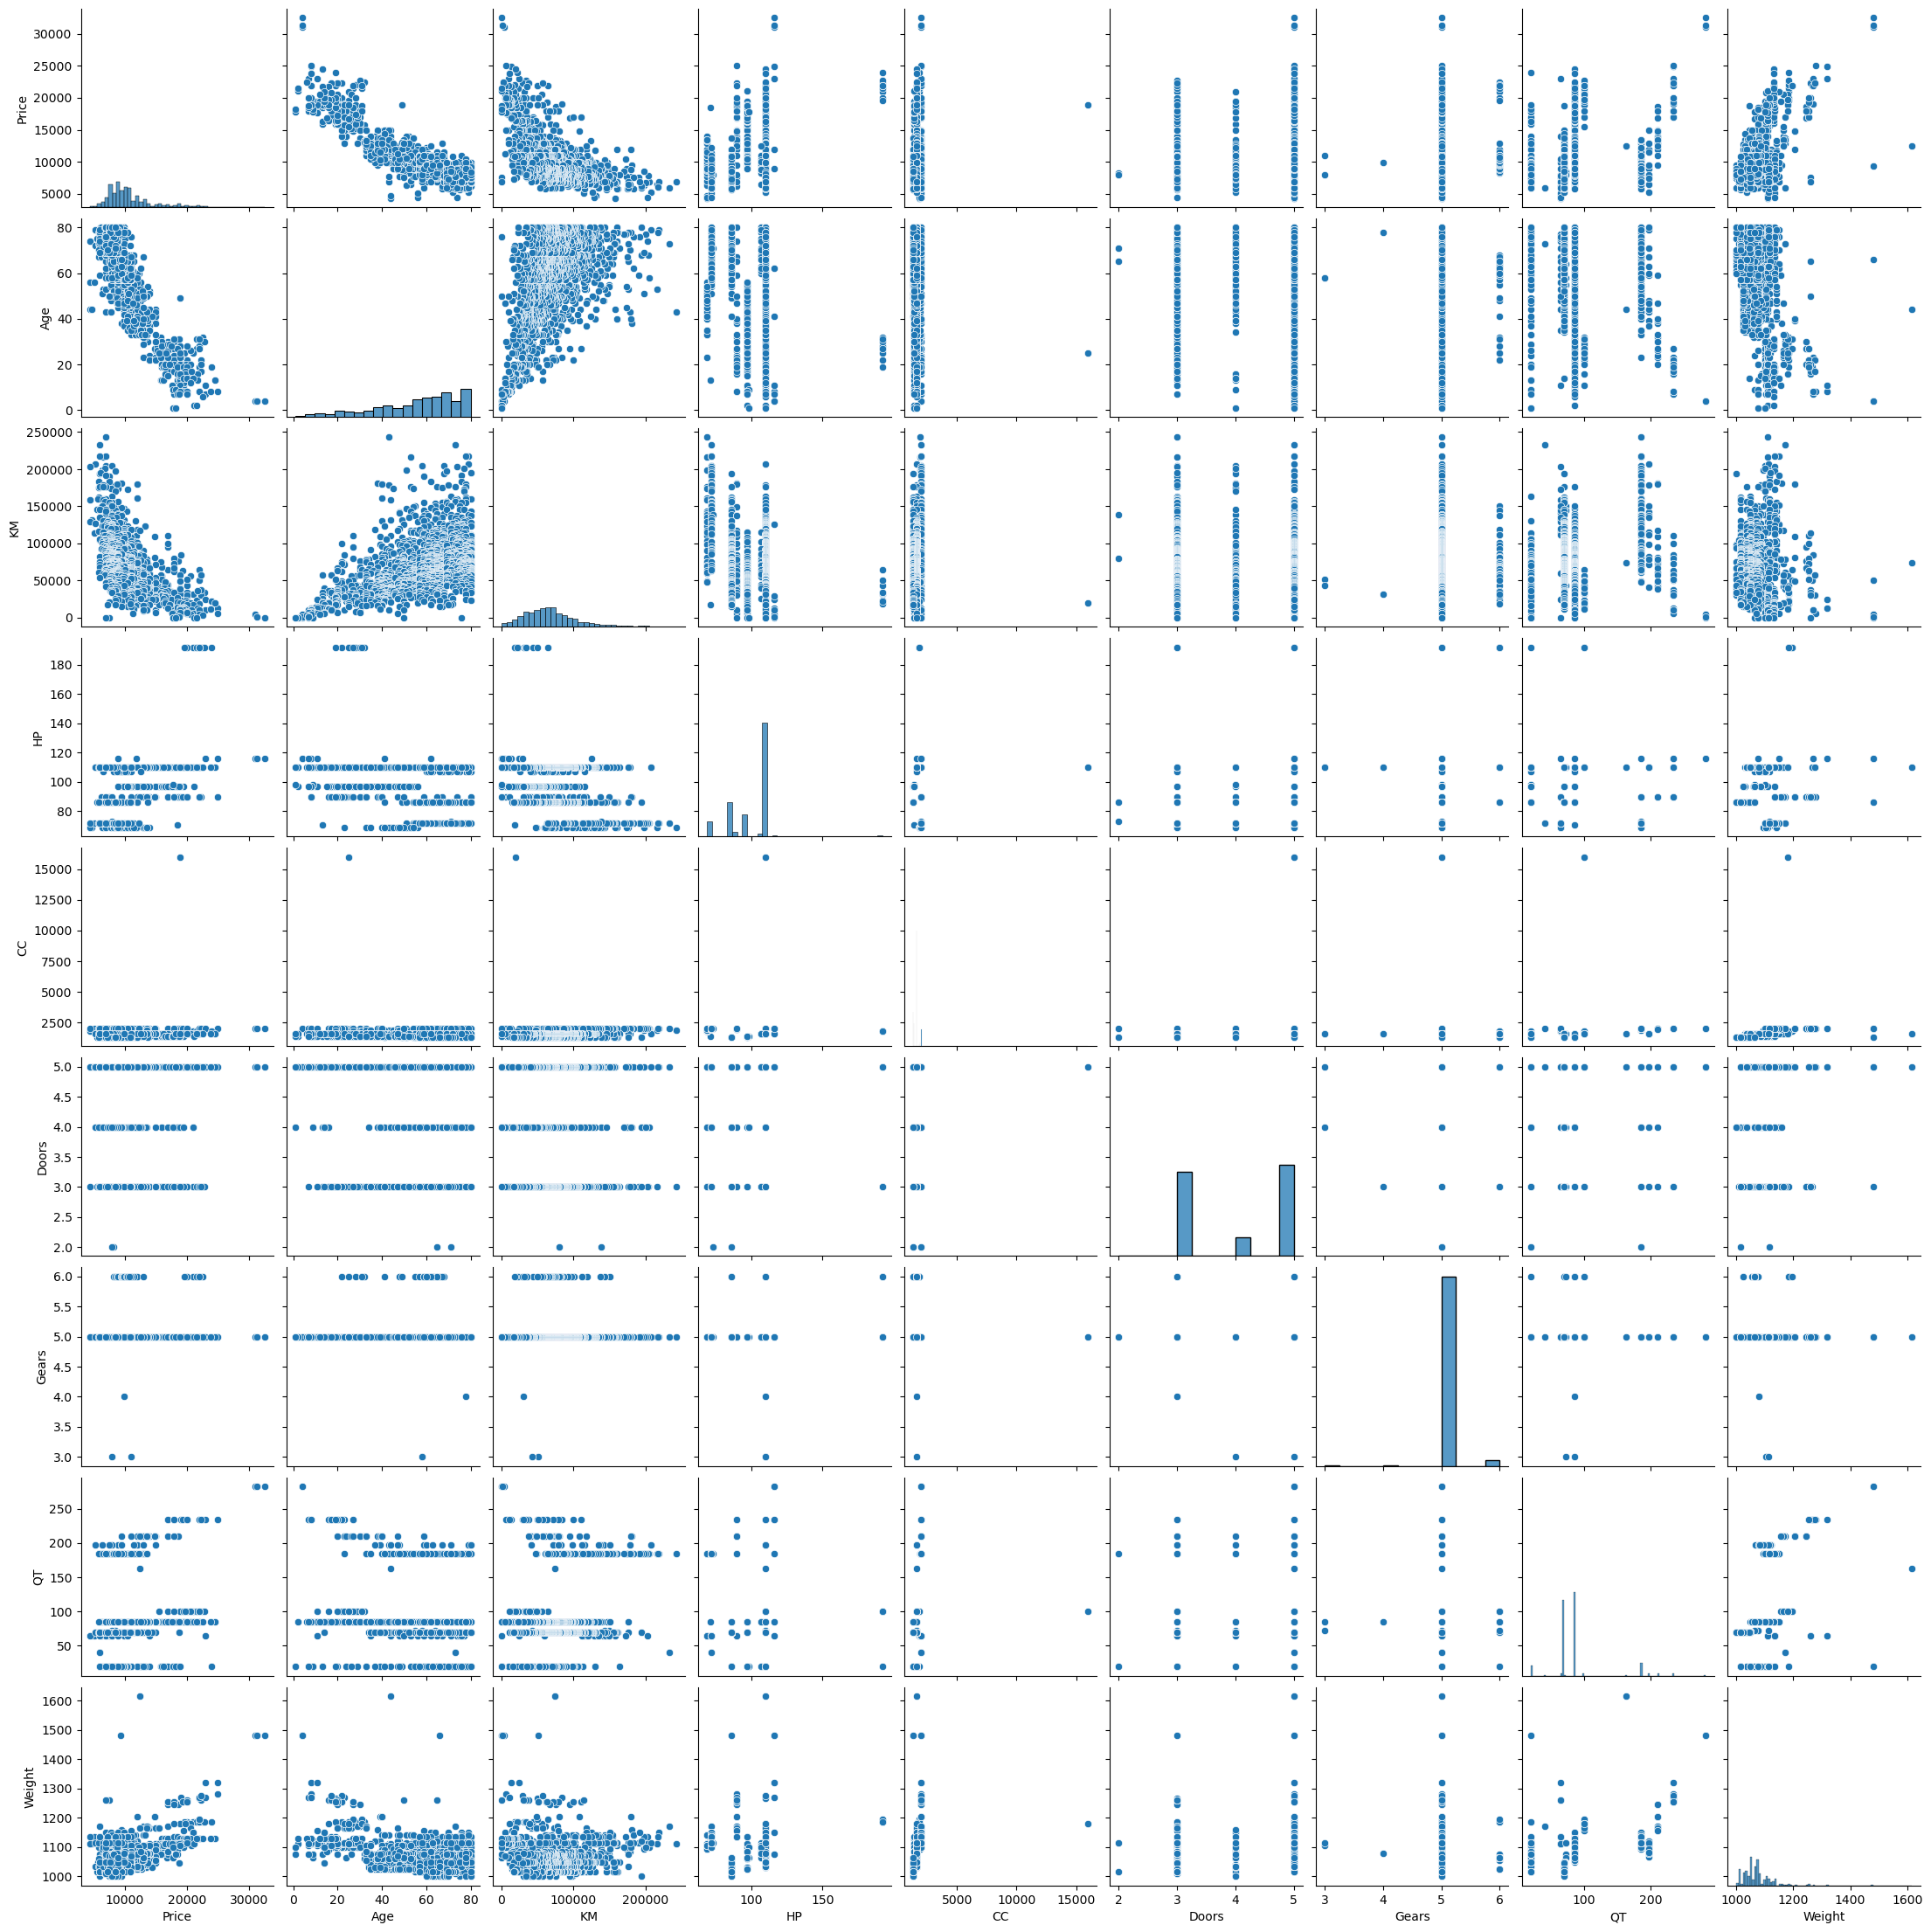

In [11]:
sns.pairplot(toyota_final)

# MODEL

In [12]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_final).fit()

In [13]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [14]:
model.tvalues,np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [15]:
#Model Accuracy
model.rsquared,model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

Here the model accuracy is 86.25%

##Building SLR & MLR models for insignificant variables (CC & Doors)

In [16]:
slrc=smf.ols('Price~CC',data=toyota_final).fit()
slrc.tvalues,slrc.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [17]:
slrd=smf.ols('Price~Doors',data=toyota_final).fit()
slrd.tvalues,slrd.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [18]:
mlr=smf.ols('Price~CC+Doors',data=toyota_final).fit()
mlr.tvalues,mlr.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation

In [19]:
#Collinearity check using VIF values

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_final).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota_final).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota_final).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota_final).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota_final).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota_final).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota_final).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota_final).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [20]:
# Putting the values in Dataframe format
d={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d)
Vif_df

Variables       Vif
0       Age  1.876236
1        KM  1.757178
2        HP  1.419180
3        CC  1.163470
4     Doors  1.155890
5     Gears  1.098843
6        QT  2.295375
7    Weight  2.487180

Here no element has VIF>20 hence no collinearity is found.

In [21]:
#Residual Analysis using Q-Q plot

sm.qqplot(model.resid,line='q');
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [22]:
#As we can clearly see the presence of outliers, lets find them.
print(list(np.where(model.resid>6000)))
print(list(np.where(model.resid<-6000)))

[array([109, 146, 522], dtype=int64)]
[array([220, 600, 959], dtype=int64)]


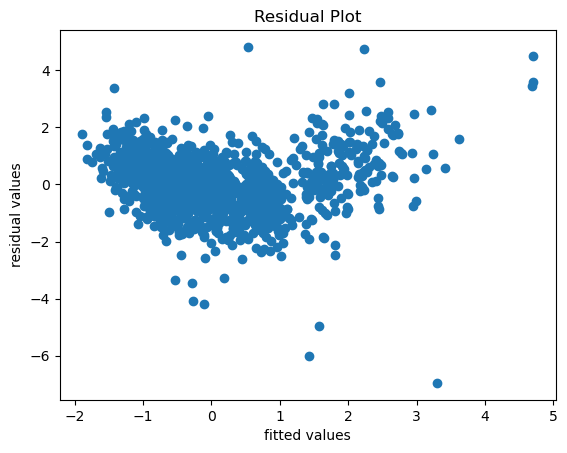

In [23]:
#testing homoscedasticity using UD function
def sv(vals):return(vals-vals.mean())/vals.std()

plt.scatter(sv(model.fittedvalues),sv(model.resid));
plt.title('Residual Plot')
plt.xlabel('fitted values')
plt.ylabel('residual values')
plt.show()

eval_env: 1


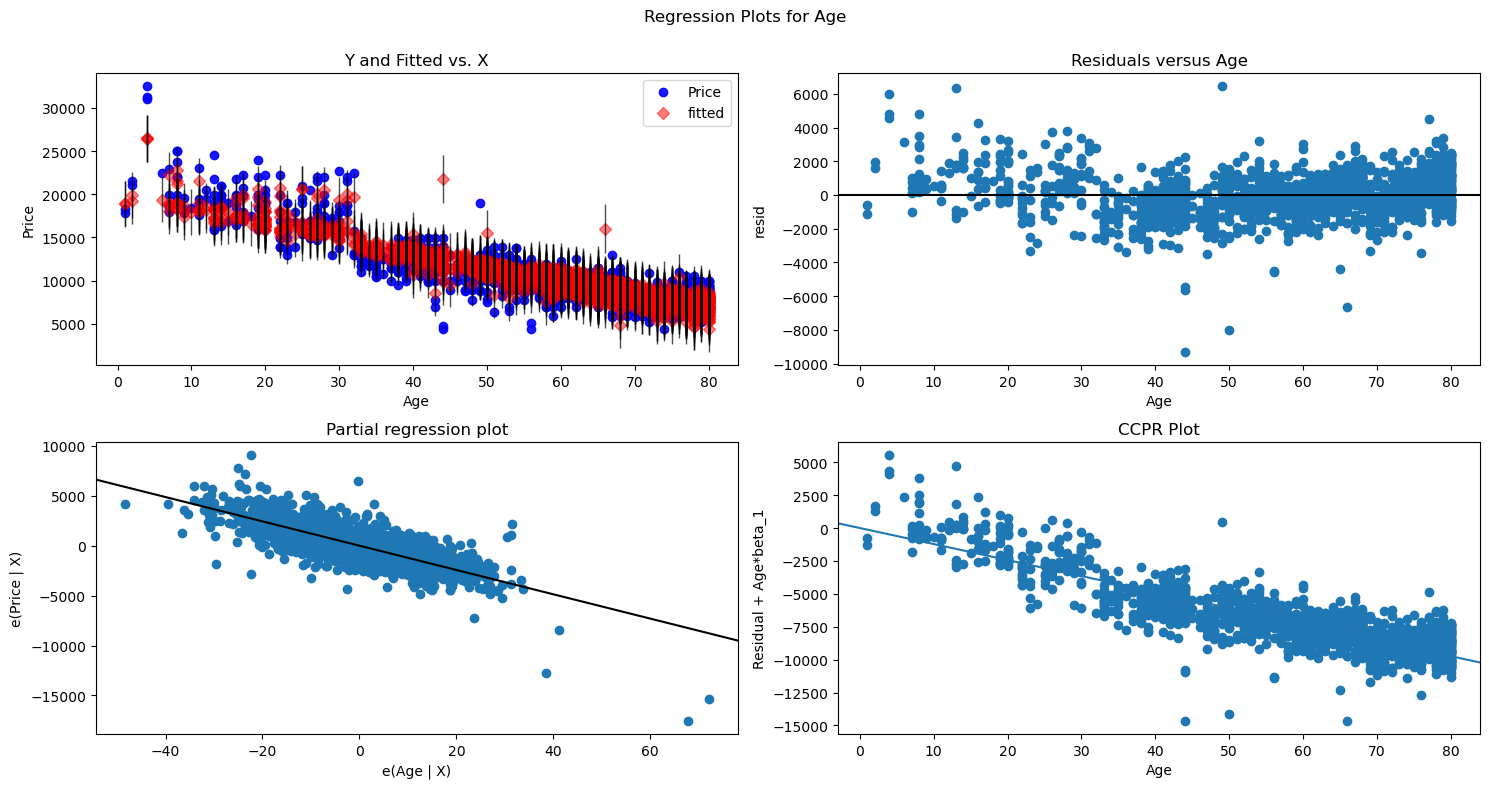

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig);
plt.show()

eval_env: 1


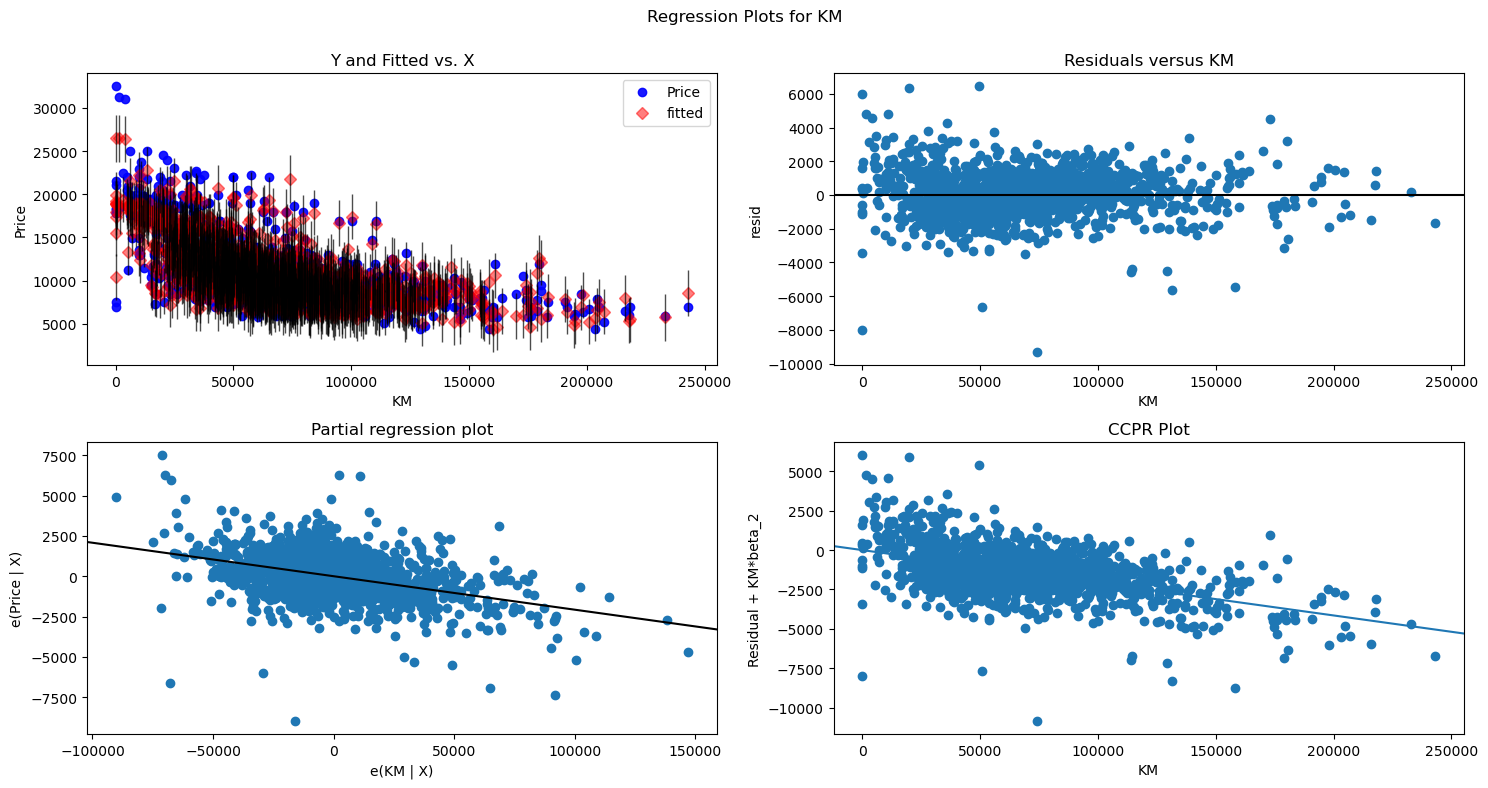

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig);
plt.show()

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig);
plt.show()

eval_env: 1


eval_env: 1


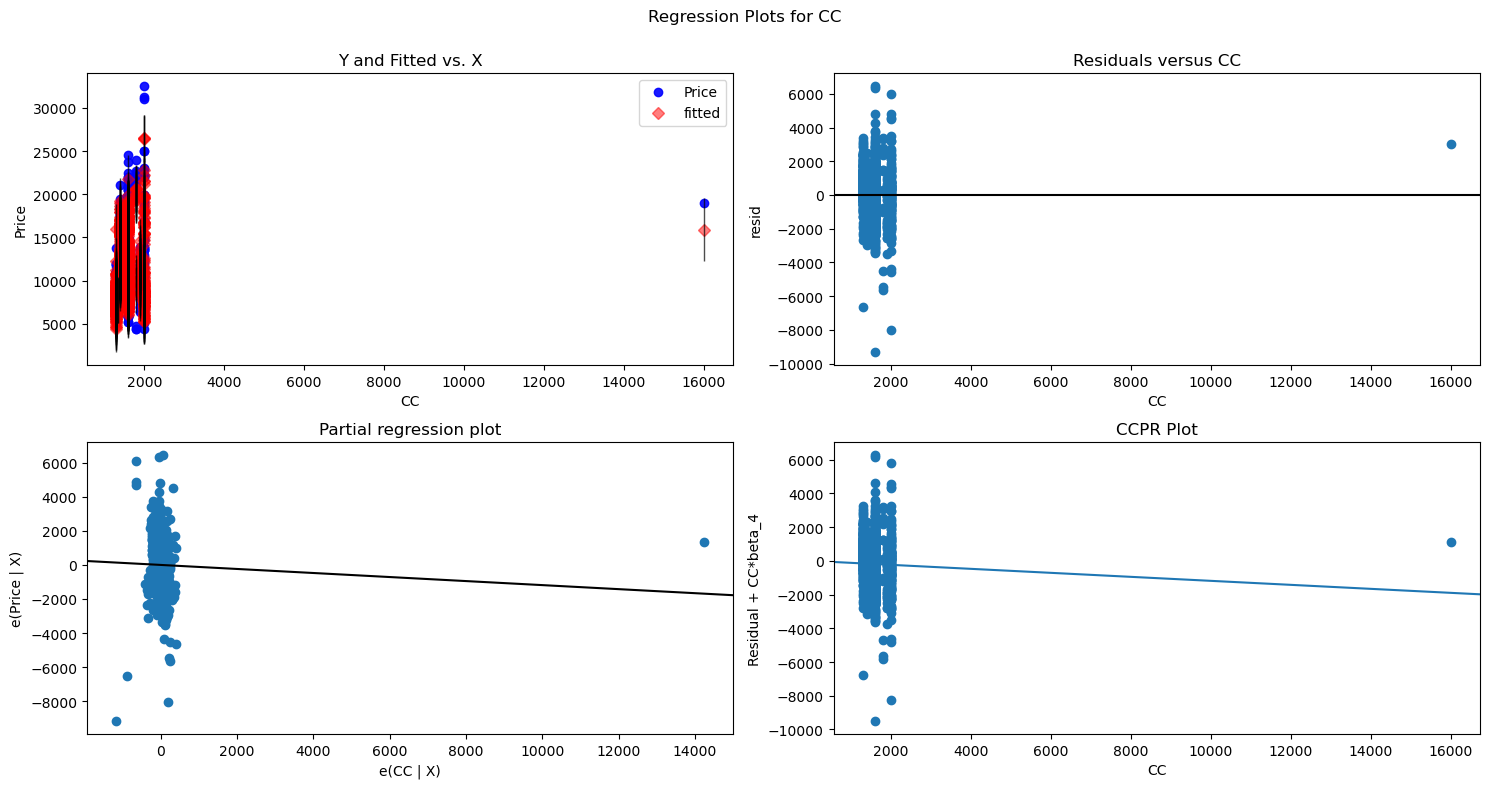

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig);
plt.show()

eval_env: 1


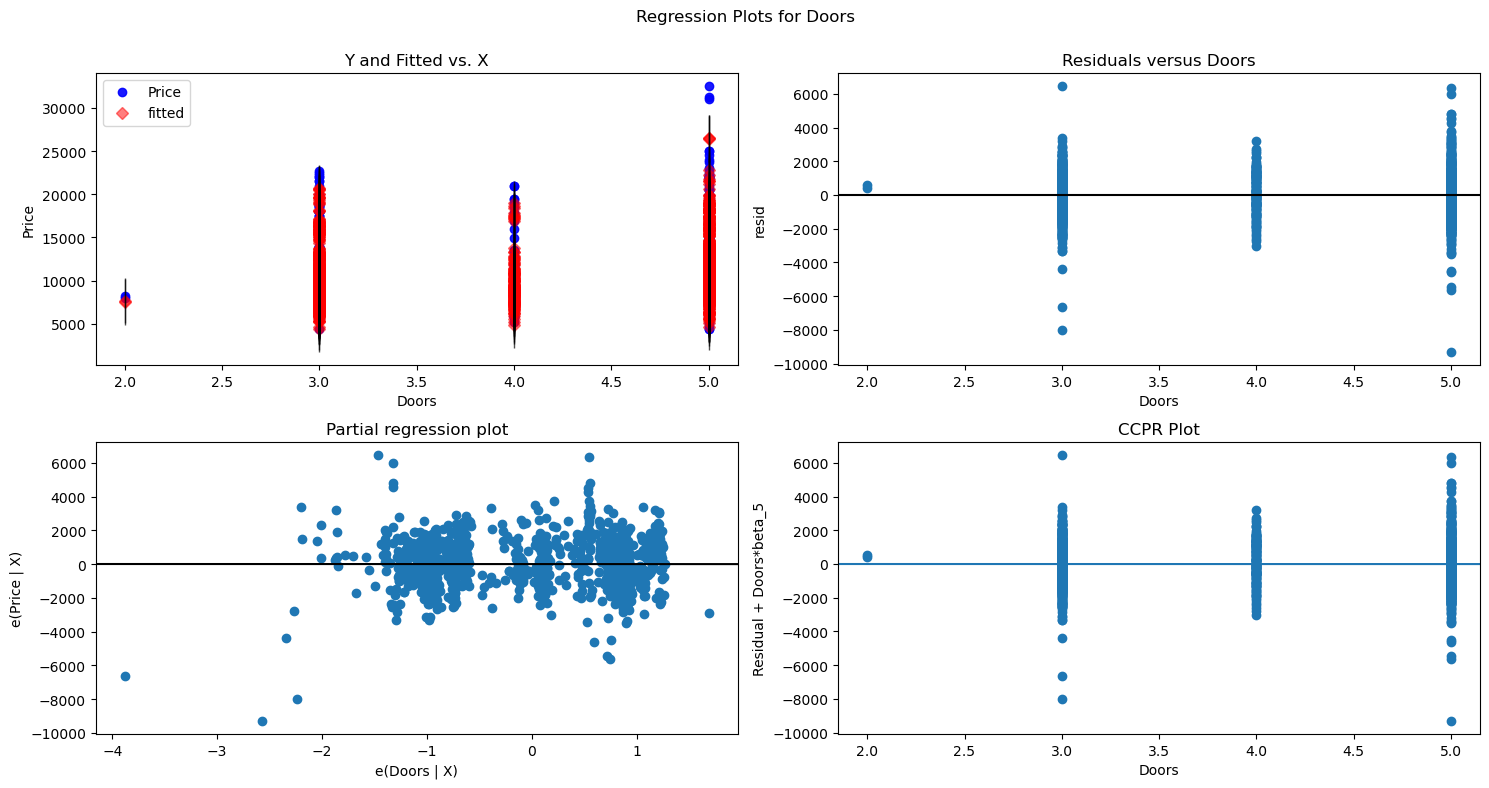

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig);
plt.show()

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig);
plt.show()

eval_env: 1


eval_env: 1


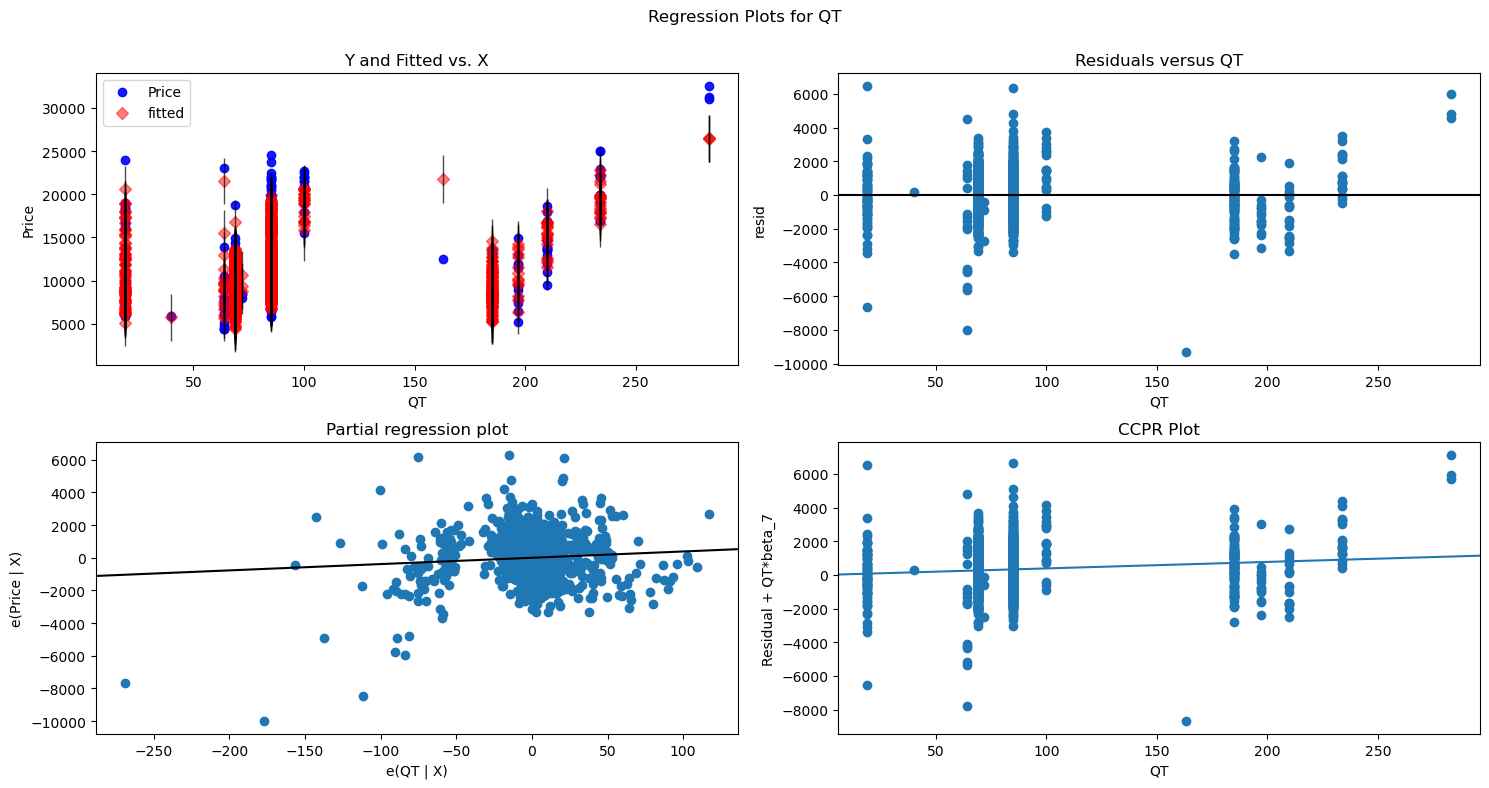

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig);
plt.show()

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig);
plt.show()

eval_env: 1


MODEL DELETION DIAGNOSTICS

In [32]:
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

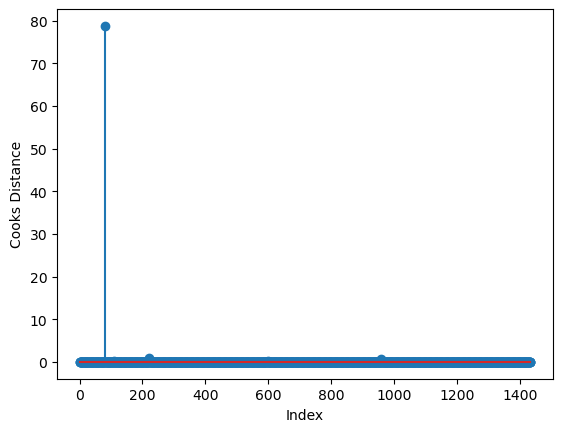

In [33]:
#plotting on stem plot
plt.stem(np.arange(len(toyota_final)),np.round(c,3));
plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#finding value of influencer C>0.5
np.argmax(c),np.max(c)

(80, 78.7295058224916)

In [35]:
toyota_final[toyota_final.index.isin([80])]

Price  Age     KM   HP     CC  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

Model Improvisation

In [36]:
toyo=toyota_final.copy()
toyo

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [37]:
toyo1=toyo.drop(toyo.index[80]).reset_index(drop=True)

In [38]:
toyo1

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   7500   69  20544   86  1300      3      5   69    1025
1430  10845   72  19000   86  1300      3      5   69    1015
1431   8500   71  17016   86  1300      3      5   69    1015
1432   7250   70  16916   86  1300      3      5   69    1015
1433   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

Model Deletion Diagnostics & Final Model

In [39]:
while np.max(c)>0.5 :
  model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo1).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c) , np.max(c)
  toyo1=toyo1.drop(toyo1.index[np.argmax(c)]).reset_index(drop=True)
  toyo1
else:
  final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo1).fit()
  final_model.rsquared , final_model.aic
  print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


Here the model accuracy is 88.82%

Model Predictions

In [40]:
new_data=pd.DataFrame({'Age':10,"KM":50000,"HP":90,"CC":1400,"Doors":4,"Gears":5,"QT":70,"Weight":1000},index=[0])
new_data

Age     KM  HP    CC  Doors  Gears  QT  Weight
0   10  50000  90  1400      4      5  70    1000

In [41]:
#Manual Prediction of Price
final_model.predict(new_data)

0    13978.340636
dtype: float64

In [42]:
#Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo1)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

Improving the model accuracy to 90%

In [43]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo1).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyo1=toyo1.drop(toyo1.index[np.argmax(c)]).reset_index(drop=True)
        toyo1
    else:
        final_model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo1).fit()
        final_model1.rsquared , final_model1.aic
        print("Thus model accuracy is improved to",final_model1.rsquared)

Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139028
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is improved to 0.8960864004304145
Thus model accuracy is improved to 0.8955820765034092
Thus model accuracy is improved to 0.8930233902806168
Thus model accuracy is impro

In [44]:
new_data1=pd.DataFrame({'Age':8,'KM':70000,'HP':100,'CC':1200,'Doors':4,'Gears':5,'QT':60,'Weight':1000},index=[0])
new_data1

Age     KM   HP    CC  Doors  Gears  QT  Weight
0    8  70000  100  1200      4      5  60    1000

In [45]:
#Manual Prediction of Price
final_model1.predict(new_data1)

0    14413.124137
dtype: float64

In [46]:
#Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model1.predict(toyo1)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64

TABLE

In [47]:
t={'Prep_Models':['Model','Final Model','Final Model 2'],'Rsquared':[model.rsquared,final_model.rsquared,final_model1.rsquared]}
table=pd.DataFrame(t)
table

Prep_Models  Rsquared
0          Model  0.900224
1    Final Model  0.888240
2  Final Model 2  0.900376

HENCE THE MODEL ACCURACIES HAVE INCREASED SIGNIFICANTLY